In [1]:
import pandas as pd
import numpy as np

In [2]:
combined_data = pd.read_csv("data_all_new.csv")

In [3]:
combined_data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow_ID_Encoded,Source_IP_Encoded,Destination_IP_Encoded
0,192.168.10.16-199.244.48.55-41936-443-6,192.168.10.16,41936,199.244.48.55,443,6,1499378400,143347,47,60,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,161071572001168899,1.654046e+19,1.750749e+18
1,192.168.10.16-54.210.195.63-42970-80-6,192.168.10.16,42970,54.210.195.63,80,6,1499378400,50905,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,5997581740167378458,1.654046e+19,6.443415e+18
2,192.168.10.16-199.244.48.55-41944-443-6,192.168.10.16,41944,199.244.48.55,443,6,1499378400,143899,46,58,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,5314193645350346795,1.654046e+19,1.750749e+18
3,192.168.10.3-192.168.10.17-53-12886-17,192.168.10.17,12886,192.168.10.3,53,17,1499378400,313,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,8620101953827772338,8.265142e+18,6.938415e+18
4,192.168.10.16-199.244.48.55-41942-443-6,192.168.10.16,41942,199.244.48.55,443,6,1499378400,142605,45,58,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,6188714476601893640,1.654046e+19,1.750749e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,157.240.18.35-192.168.10.51-443-55641-6,157.240.18.35,443,192.168.10.51,55641,6,1499326140,49,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,3604146490406314642,9.110002e+18,5.026067e+18
2830739,192.168.10.51-199.16.156.120-45337-443-6,199.16.156.120,443,192.168.10.51,45337,6,1499326140,217,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,16626874294717829488,1.360505e+19,5.026067e+18
2830740,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.12,60148,192.168.10.50,22,6,1499326140,1387547,41,46,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,3636825700272659204,1.304055e+19,6.284869e+18
2830741,192.168.10.12-192.168.10.50-60146-22-6,192.168.10.12,60146,192.168.10.50,22,6,1499326140,207,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,13109609938317092551,1.304055e+19,6.284869e+18


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 88 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    int64  
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  

In [5]:
combined_data = combined_data.drop('Flow ID', axis=1)

In [6]:
combined_data = combined_data.drop('Source IP', axis=1)
combined_data = combined_data.drop('Destination IP', axis=1)

In [7]:
column_names = combined_data.columns
print(column_names)

Index(['Source Port', 'Destination Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance

In [8]:
for col_name in column_names:
    print("\nNull values in ",col_name," = ",combined_data[col_name].isna().sum())


Null values in  Source Port  =  0

Null values in  Destination Port  =  0

Null values in  Protocol  =  0

Null values in  Timestamp  =  0

Null values in  Flow Duration  =  0

Null values in  Total Fwd Packets  =  0

Null values in  Total Backward Packets  =  0

Null values in  Total Length of Fwd Packets  =  0

Null values in  Total Length of Bwd Packets  =  0

Null values in  Fwd Packet Length Max  =  0

Null values in  Fwd Packet Length Min  =  0

Null values in  Fwd Packet Length Mean  =  0

Null values in  Fwd Packet Length Std  =  0

Null values in  Bwd Packet Length Max  =  0

Null values in  Bwd Packet Length Min  =  0

Null values in  Bwd Packet Length Mean  =  0

Null values in  Bwd Packet Length Std  =  0

Null values in  Flow Bytes/s  =  2867

Null values in  Flow Packets/s  =  2867

Null values in  Flow IAT Mean  =  0

Null values in  Flow IAT Std  =  0

Null values in  Flow IAT Max  =  0

Null values in  Flow IAT Min  =  0

Null values in  Fwd IAT Total  =  0

Null valu

In [9]:
combined_data['Flow Bytes/s']

0          767898.874800
1               0.000000
2          774918.519200
3          945686.901000
4          771894.393600
               ...      
2830738    489795.918400
2830739    170506.912400
2830740      6747.158835
2830741         0.000000
2830742         0.000000
Name: Flow Bytes/s, Length: 2830743, dtype: float64

In [10]:
# Get the count of Zeros in column 'C' 
count = (combined_data['Flow Bytes/s'] == 0).sum()

print('Count of zeros in Column  : ', count)

Count of zeros in Column  :  355767


In [11]:
for col_name in column_names:
    print("\nZero values in ",col_name," = ",(combined_data[col_name] == 0).sum())


Zero values in  Source Port  =  1696

Zero values in  Destination Port  =  1696

Zero values in  Protocol  =  1696

Zero values in  Timestamp  =  0

Zero values in  Flow Duration  =  2867

Zero values in  Total Fwd Packets  =  0

Zero values in  Total Backward Packets  =  453519

Zero values in  Total Length of Fwd Packets  =  449170

Zero values in  Total Length of Bwd Packets  =  707746

Zero values in  Fwd Packet Length Max  =  449170

Zero values in  Fwd Packet Length Min  =  1317226

Zero values in  Fwd Packet Length Mean  =  449170

Zero values in  Fwd Packet Length Std  =  1850684

Zero values in  Bwd Packet Length Max  =  707746

Zero values in  Bwd Packet Length Min  =  1437867

Zero values in  Bwd Packet Length Mean  =  707746

Zero values in  Bwd Packet Length Std  =  2026514

Zero values in  Flow Bytes/s  =  355767

Zero values in  Flow Packets/s  =  0

Zero values in  Flow IAT Mean  =  2867

Zero values in  Flow IAT Std  =  998326

Zero values in  Flow IAT Max  =  2866

Z

In [12]:
count_attacks = list(combined_data['Label'].unique())

In [13]:
count_attacks

['BENIGN',
 'DDoS',
 'Bot',
 'PortScan',
 'FTP-Patator',
 'SSH-Patator',
 'DoS slowloris',
 'DoS Slowhttptest',
 'DoS Hulk',
 'DoS GoldenEye',
 'Heartbleed',
 'Infiltration',
 'Web Attack Brute Force',
 'Web Attack XSS',
 'Web Attack Sql Injection']

### Filtering the data based on the type of attacks:

In [14]:
import matplotlib.pyplot as plt

In [15]:
count_attacks_unique_largest = []
attacks_lar = []
count_attacks_unique_med = []
attacks_med = []
count_attacks_unique_small = []
attacks_sml = []
temp_count = 0

for x in count_attacks:
    temp_count = (combined_data['Label'] == x).sum()
    if temp_count >= 11000:
        count_attacks_unique_largest.append(temp_count)
        attacks_lar.append(x)
    if (temp_count >= 600) and (temp_count < 11000):
        count_attacks_unique_med.append(temp_count)
        attacks_med.append(x)
    if temp_count < 600:
        count_attacks_unique_small.append(temp_count)
        attacks_sml.append(x)


In [16]:
print(attacks_lar)
print(count_attacks_unique_largest)
print(attacks_med)
print(count_attacks_unique_med)
print(attacks_sml)
print(count_attacks_unique_small)

['BENIGN', 'DDoS', 'PortScan', 'DoS Hulk']
[2359289, 41835, 158930, 231073]
['Bot', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS GoldenEye', 'Web Attack Brute Force', 'Web Attack XSS']
[1966, 7938, 5897, 5796, 5499, 10293, 1507, 652]
['Heartbleed', 'Infiltration', 'Web Attack Sql Injection']
[11, 36, 21]


<BarContainer object of 4 artists>

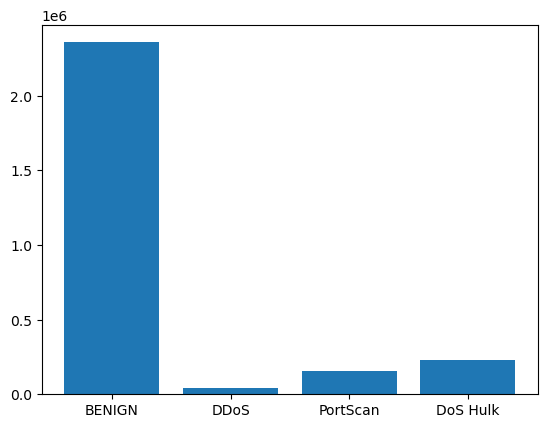

In [17]:
plt.bar(attacks_lar,count_attacks_unique_largest)

<BarContainer object of 8 artists>

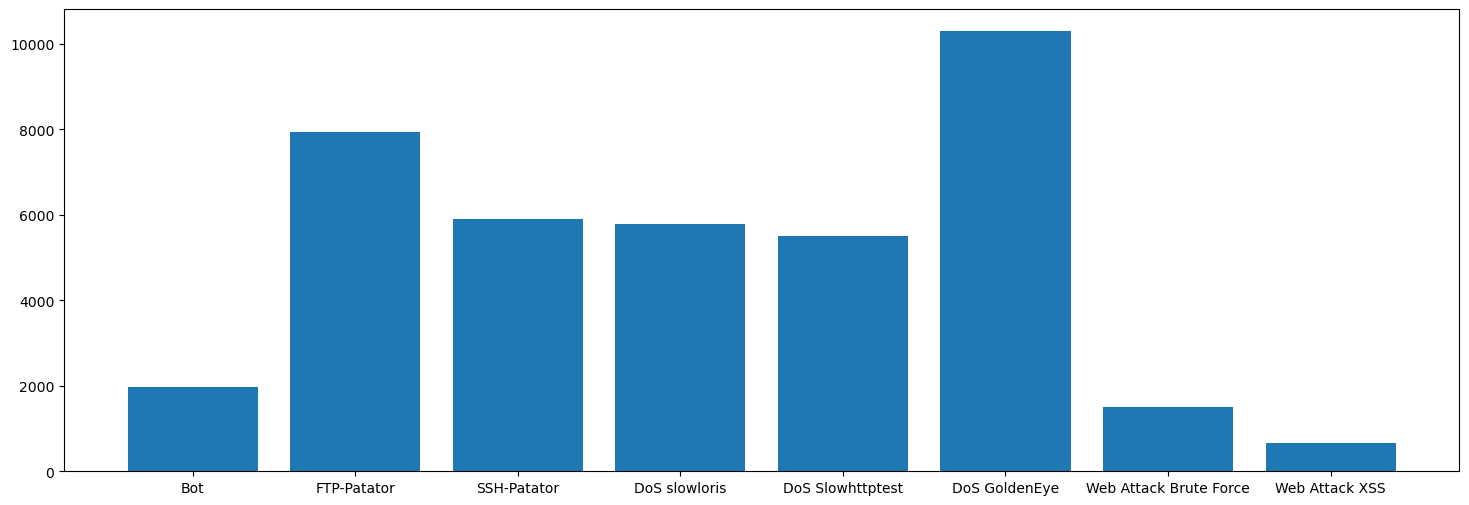

In [18]:
plt.figure(figsize=(18, 6))
plt.bar(attacks_med,count_attacks_unique_med)

<BarContainer object of 3 artists>

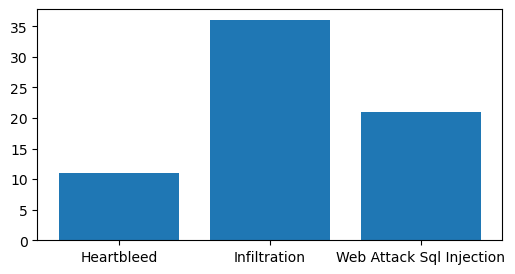

In [19]:
plt.figure(figsize=(6, 3))
plt.bar(attacks_sml,count_attacks_unique_small)

In [21]:
df = pd.read_csv("data_all_new.csv")

In [23]:
import networkx as nx
import plotly.graph_objects as go

# Create a network graph
G = nx.DiGraph()

# Add nodes and edges from your dataset
for i, row in df.iterrows():
    G.add_edge(row['Source IP'], row['Destination IP'], weight=row['Flow Duration'])

# Create a layout for the graph
pos = nx.spring_layout(G)

# Create edge traces
edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node traces
node_trace = go.Scatter(x=[], y=[], text=[], mode='markers+text', textposition='top center', marker=dict(size=10, color='#1f78b4'))
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)

# Plot
fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest', xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=False, zeroline=False)))
fig.show()


KeyboardInterrupt: 

In [ ]:
import plotly.express as px

# Example: Animated line chart of Flow Duration over time
fig = px.line(df, x='Timestamp', y='Flow Duration', color='Label',
              animation_frame='Timestamp',
              title='Flow Duration Over Time',
              labels={'Timestamp': 'Timestamp', 'Flow Duration': 'Flow Duration'})
fig.show()


In [ ]:

# Calculate correlation matrix
corr = df.corr()

# Interactive Heatmap
fig = px.imshow(corr, text_auto=True, aspect='auto',
                title='Correlation Heatmap')
fig.show()
